Importing Librarires

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
sns.set_style('darkgrid')
plt.rcParams['font.size'] = 15
plt.rcParams['figure.figsize'] =(10,7)
plt.rcParams['figure.facecolor'] ='#FFE5B4'


In [3]:
data = pd.read_csv('C:\\Users\\KAJAL\\Downloads\\World Happiness Data 5.csv')

In [4]:
data.head()

,Country name,Regional Indicator,Happiness Score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.804,0.036,7.875,7.733,10.792,0.969,71.150,0.961,-0.019,0.182,1.778,1.888,1.585,0.535,0.772,0.126,0.535,2.363
1,Denmark,Western Europe,7.586,0.041,7.667,7.506,10.962,0.954,71.250,0.934,0.134,0.196,1.778,1.949,1.548,0.537,0.734,0.208,0.525,2.084
2,Iceland,Western Europe,7.530,0.049,7.625,7.434,10.896,0.983,72.050,0.936,0.211,0.668,1.778,1.926,1.620,0.559,0.738,0.250,0.187,2.250
3,Israel,Western Europe,7.473,0.032,7.535,7.411,10.639,0.943,72.697,0.809,-0.023,0.708,1.778,1.833,1.521,0.577,0.569,0.124,0.158,2.691
4,Netherlands,Western Europe,7.403,0.029,7.460,7.346,10.942,0.930,71.550,0.887,0.213,0.379,1.778,1.942,1.488,0.545,0.672,0.251,0.394,2.110


In [5]:
data_columns=['Country name','Regional Indicator','Happiness Score','Logged GDP per capita','Social support','Healthy life expectancy',
               'Freedom to make life choices','Generosity','Perceptions of corruption']

In [6]:
data=data[data_columns].copy()

In [7]:
happy_df = data.rename(columns={'Country name':'country_name','Regional Indicator':'regional_indicator', 'Happiness Score':'happiness_score', 'Logged GDP per capita':'logged_gdp_per_capita', 'Social support':'social_support', 'Healthy life expectancy':'healthy_life_expectancy', 'Freedom to make life choices':'freedom_to_make_life_choices', 'Generosity':'generosity', 'Perceptions of corruption':'perceptions_of_corruption'})



In [8]:
happy_df.head()

,country_name,regional_indicator,happiness_score,logged_gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,Finland,Western Europe,7.804,10.792,0.969,71.150,0.961,-0.019,0.182
1,Denmark,Western Europe,7.586,10.962,0.954,71.250,0.934,0.134,0.196
2,Iceland,Western Europe,7.530,10.896,0.983,72.050,0.936,0.211,0.668
3,Israel,Western Europe,7.473,10.639,0.943,72.697,0.809,-0.023,0.708
4,Netherlands,Western Europe,7.403,10.942,0.930,71.550,0.887,0.213,0.379


In [9]:
happy_df.isnull().sum()

country_name                    0
regional_indicator              0
happiness_score                 0
logged_gdp_per_capita           0
social_support                  0
healthy_life_expectancy         1
freedom_to_make_life_choices    0
generosity                      0
perceptions_of_corruption       0
dtype: int64

Text(0, 0.5, 'GDP Per Capita')

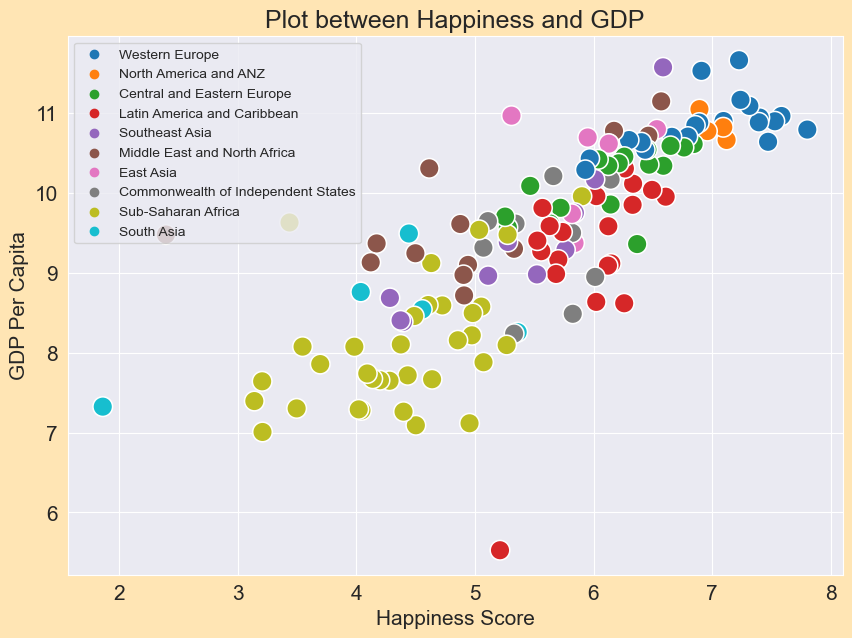

In [10]:
# Plot between happines and gdp



plt.title('Plot between Happiness and GDP')
sns.scatterplot(x=happy_df.happiness_score, y=happy_df.logged_gdp_per_capita, hue=happy_df.regional_indicator, s=200)

plt.legend(loc = 'upper left', fontsize ='10')
plt.xlabel('Happiness Score')
plt.ylabel('GDP Per Capita')

From the above plot we can see that 
  1. Sub-Saharan Africa has low  Happiness score .
  2. There is an outlier in the South Asian region so we can assume that Afghanisthan is the least happiest country .
  3. Central and East Europe, Latin America and Carribbean,South East Asia and East Asia are the countries with moderate GDP          and Happiness Score.
  4. Western Europe and North America and ANZ are the most happiest countries with highest GDP.
  

In [11]:
gdp_region = happy_df.groupby('regional_indicator')['logged_gdp_per_capita'].sum()
gdp_region

regional_indicator
Central and Eastern Europe            172.582
Commonwealth of Independent States     84.121
East Asia                              62.182
Latin America and Caribbean           176.511
Middle East and North Africa          125.859
North America and ANZ                  43.304
South Asia                             42.370
Southeast Asia                         93.578
Sub-Saharan Africa                    266.372
Western Europe                        227.743
Name: logged_gdp_per_capita, dtype: float64

Text(0, 0.5, '')

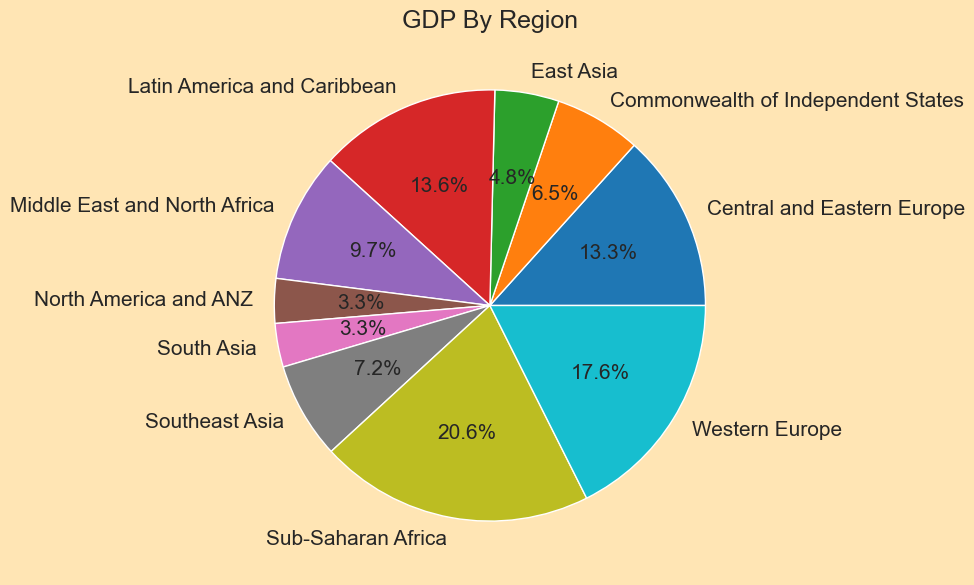

In [12]:
gdp_region.plot.pie(autopct ='%1.1f%%')
plt.title('GDP By Region')
plt.ylabel('')

1. Sub-Saharan-Africa, Western Europe, Latin America and Carribean and Central and Eastern Europe  region are the highest GDP      contributors.
2. SouthEast Asia ,Middle East and North Africa and Commenwealth of Independant States are the moderate GDP contributors.
3. East Asia, South Asia and North America and ANZ are the least GDP contributors.

In [13]:
# Total Countries

total_country =happy_df.groupby('regional_indicator')[['country_name']].count()
print(total_country)

                                    country_name
regional_indicator                              
Central and Eastern Europe                    17
Commonwealth of Independent States             9
East Asia                                      6
Latin America and Caribbean                   19
Middle East and North Africa                  13
North America and ANZ                          4
South Asia                                     5
Southeast Asia                                10
Sub-Saharan Africa                            33
Western Europe                                21


C:\Users\KAJAL\AppData\Local\Temp\ipykernel_19620\2957054943.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(cor,mask = np.zeros_like(cor, dtype=np.bool),


<AxesSubplot:>

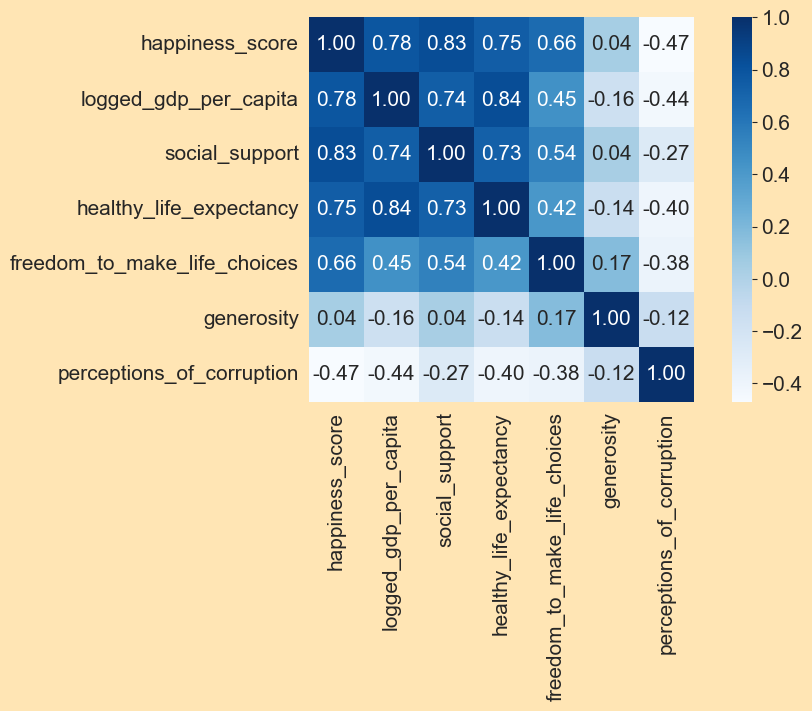

In [14]:
# Correlation Map

cor=happy_df.corr(method ="pearson")
f, ax = plt.subplots(figsize =(10,5))
sns.heatmap(cor,mask = np.zeros_like(cor, dtype=np.bool),
           cmap="Blues" , annot=True ,fmt=".2f",square = True, ax=ax)


 1. Happiness_Score is hilghly correlated with social_support.
 2. Logged_gdp_per_capita is highly correlatrd with healthy_life_expectancy.
 3. Freedom_to_make_choices is correrelated with happiness_score.
 4. Genorisity is correlated with freedom_to_make_choices
 5. Perceptions_of_corruption is negatively correlated with almost every variable.

In [15]:
# Corruption in Regions

corruption = happy_df.groupby('regional_indicator')[['perceptions_of_corruption']].mean()
print(corruption)

                                    perceptions_of_corruption
regional_indicator                                           
Central and Eastern Europe                           0.831529
Commonwealth of Independent States                   0.749778
East Asia                                            0.663833
Latin America and Caribbean                          0.783158
Middle East and North Africa                         0.758385
North America and ANZ                                0.469000
South Asia                                           0.799800
Southeast Asia                                       0.709700
Sub-Saharan Africa                                   0.785727
Western Europe                                       0.517762


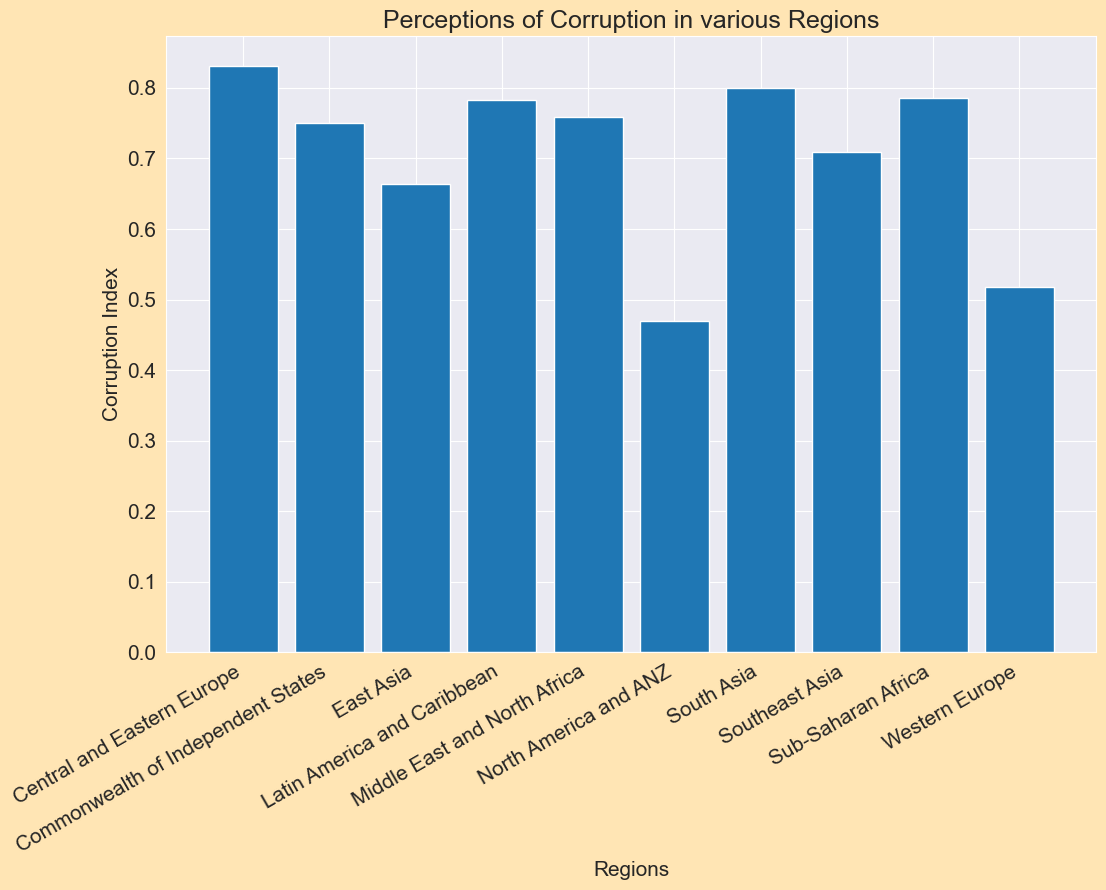

In [16]:
plt.rcParams['figure.figsize'] =(12,8)
plt.title('Perceptions of Corruption in various Regions')
plt.xlabel('Regions', fontsize = 15)
plt.ylabel('Corruption Index',fontsize = 15)
plt.xticks(rotation = 30, ha='right')
plt.bar(corruption.index, corruption.perceptions_of_corruption)
plt.show()

1. Central and Eastern Europe, Latin America and Caribbean, Sub-Saharan Africa,Latin and South Asia regions have the highest        corruption rate.
2. Commonwealth of Independent States, East Asia, Middle East and North America , and Southeast Asia have moderate corruption      rate.
3. North America and ANZ and Western Europe regions have least corruption rate.

In [17]:
top_10 = happy_df.head(10)
bottom_10 = happy_df.tail(10)

C:\Users\KAJAL\AppData\Local\Temp\ipykernel_19620\2791919259.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(xlabels,rotation=45, ha='right')
C:\Users\KAJAL\AppData\Local\Temp\ipykernel_19620\2791919259.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(xlabels,rotation=45, ha='right')


Text(832.0858585858584, 0.5, 'Life Expectancy')

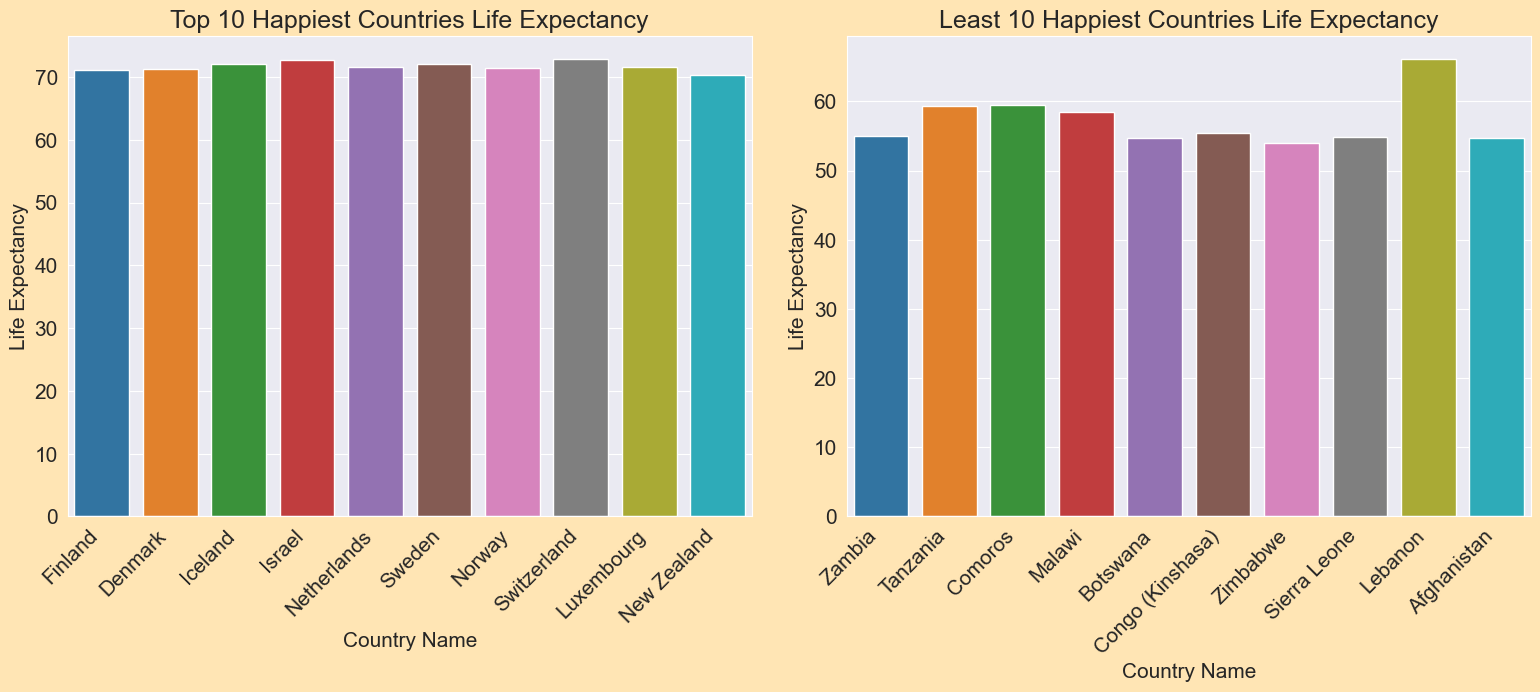

In [18]:
fig, axes = plt.subplots(1,2, figsize = (16,6))
plt.tight_layout(pad = 2)
xlabels = top_10.country_name
axes[0].set_title('Top 10 Happiest Countries Life Expectancy')
axes[0].set_xticklabels(xlabels,rotation=45, ha='right')
sns.barplot(x=top_10.country_name, y= top_10.healthy_life_expectancy, ax=axes[0])
axes[0].set_xlabel('Country Name')
axes[0].set_ylabel('Life Expectancy')


xlabels = bottom_10.country_name
axes[1].set_title('Least 10 Happiest Countries Life Expectancy')
axes[1].set_xticklabels(xlabels,rotation=45, ha='right')
sns.barplot(x=bottom_10.country_name, y= bottom_10.healthy_life_expectancy, ax=axes[1])
axes[1].set_xlabel('Country Name')
axes[1].set_ylabel('Life Expectancy')

1. The above graph depicits that the top 10 happiest countries have higher expectancy rate as compared to least happy countries
2. The average life expectancy in happiest countries is arround 70 and in least happy countries it is around 50-65.

Text(0, 0.5, 'Happiness Score')

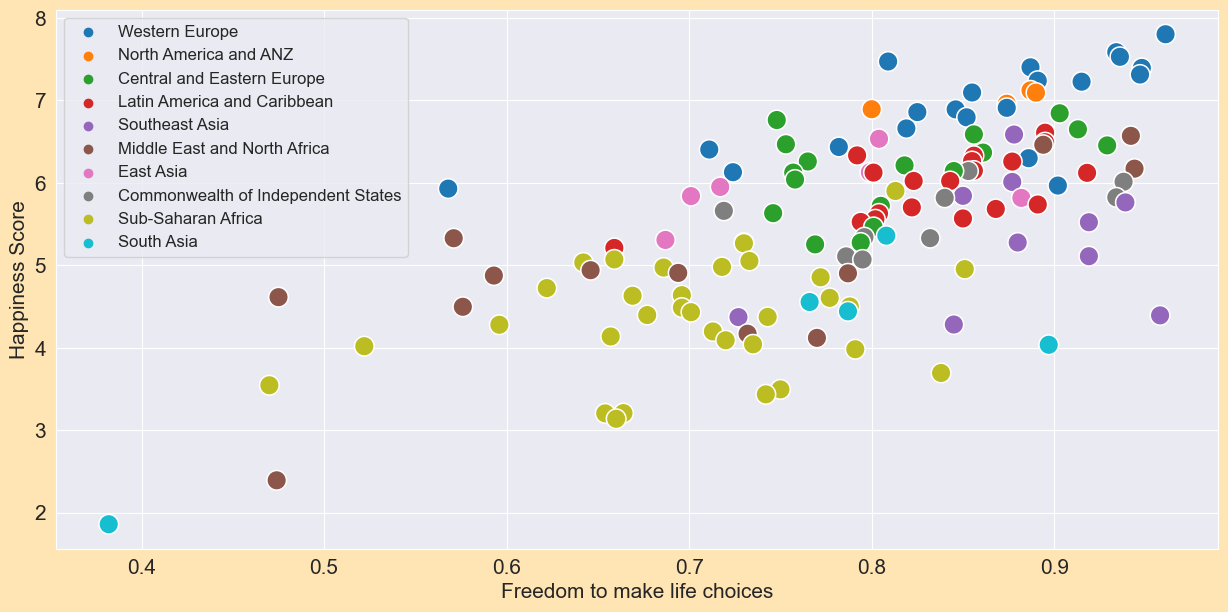

In [19]:
# Plot between Freedom to make life choices and Happiness Score

plt.rcParams['figure.figsize'] = (15,7)
sns.scatterplot(x = happy_df.freedom_to_make_life_choices, y = happy_df.happiness_score, hue= happy_df.regional_indicator, s = 200)

plt.legend(loc = 'upper left' , fontsize ='12')
plt.xlabel('Freedom to make life choices')
plt.ylabel('Happiness Score')

1. From the above we can se that the some countries in Middle East and North Africa, South Asia and Sub-Saharan Africa has low      rate of freedom to make like choices.
2. There's an outlier in the South Asian region so we can assume that Afghanisthan has lower happiness rate as well as freedom      to make life choices.
3. The Southeast Asia, Commonwealth of Independant States,Latin America and Caribbean and East Asia regions have moderate          happiness rate with high rate of freedom to make life choices.
4. North America and ANZ,Cental and Eastern Europe has moderate to high rate of happiness as well as freedom to make life          choices.
5. The Western Europe have the highest happiness score as well as freedom to make life choices.

<BarContainer object of 10 artists>

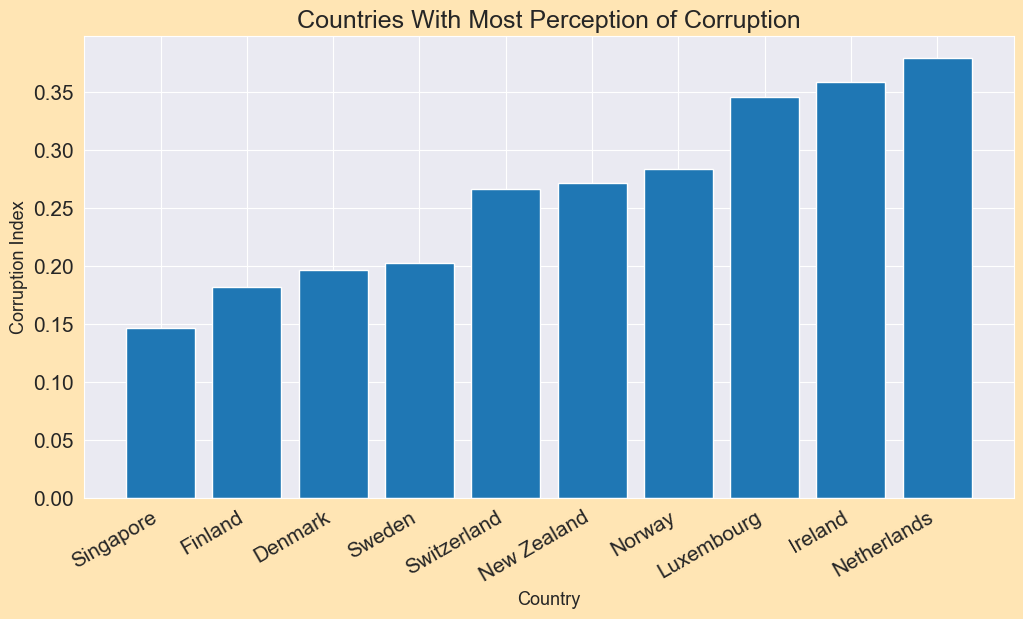

In [20]:
#Highly Corrupted Countries

country = happy_df.sort_values(by='perceptions_of_corruption').head(10)
plt.rcParams['figure.figsize']=(12,6)
plt.title('Countries With Most Perception of Corruption')

plt.xlabel('Country',fontsize = 13)
plt.ylabel('Corruption Index', fontsize = 13)
plt.xticks(rotation = 30, ha='right')
plt.bar(country.country_name, country.perceptions_of_corruption)

1. Netherlands, Ireland and Luexembourg have the highest corruption index.
2. Norway, New Zealand and Switzerland are the countries which have moderate corruption index.
3. Singapore, Findland, Denmark and Sweden has the lowest corruption index,

<BarContainer object of 10 artists>

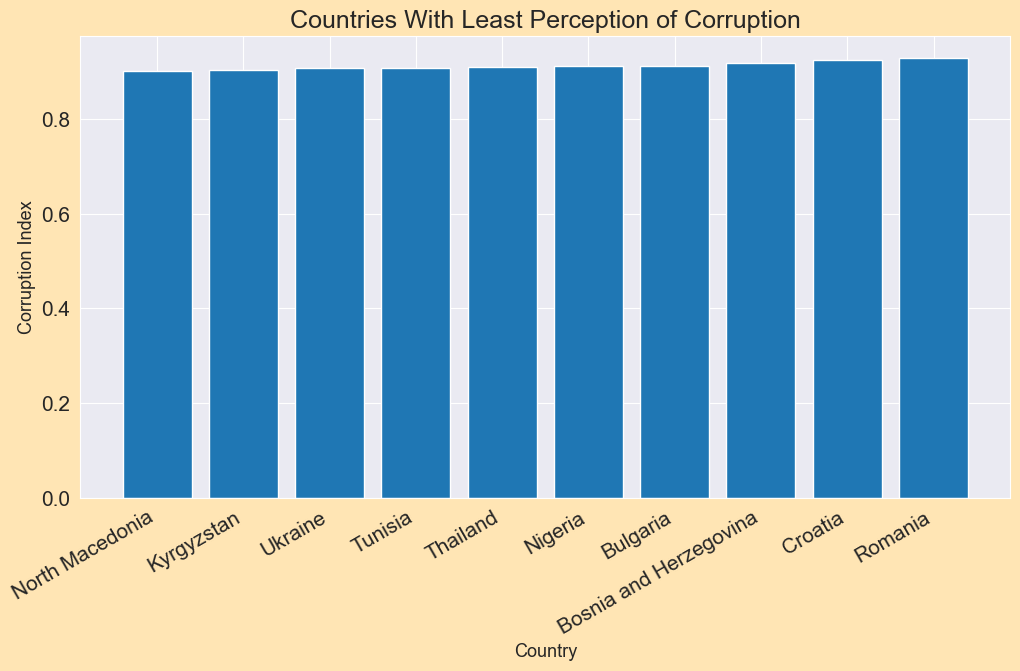

In [21]:
# Least Corrupted Countries

country = happy_df.sort_values(by='perceptions_of_corruption').tail(10)
plt.rcParams['figure.figsize']=(12,6)
plt.title('Countries With Least Perception of Corruption')

plt.xlabel('Country',fontsize = 13)
plt.ylabel('Corruption Index', fontsize = 13)
plt.xticks(rotation = 30, ha='right')
plt.bar(country.country_name, country.perceptions_of_corruption)

These countries have the least corruption 

Text(0, 0.5, 'Corruption')

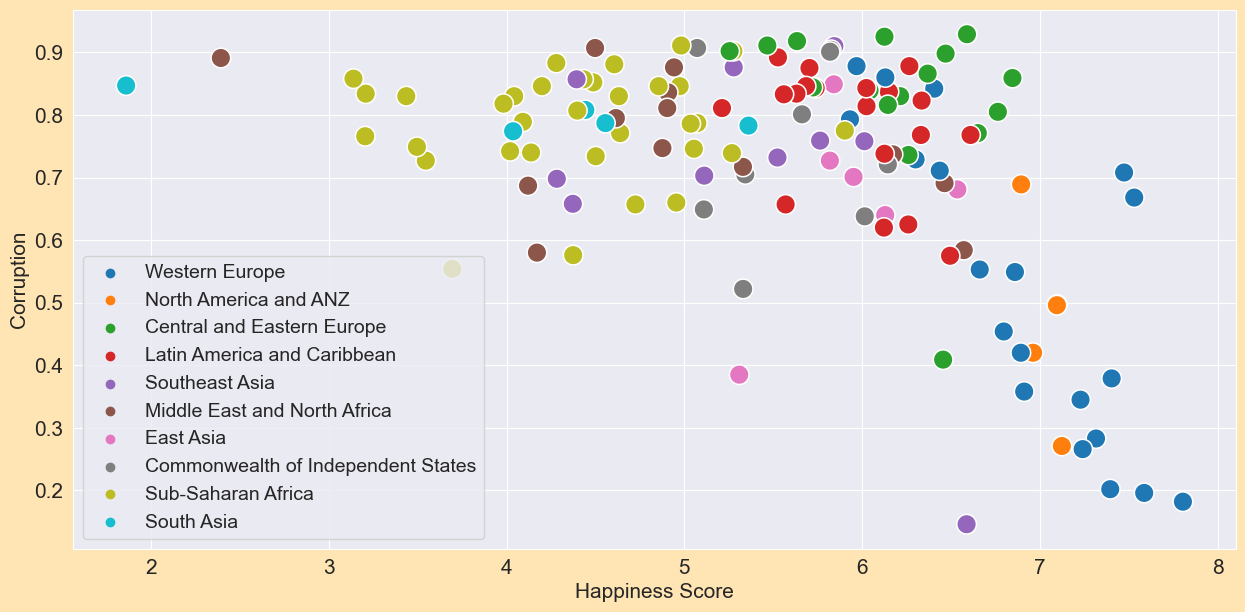

In [22]:
# Corruption VS Happiness Score

plt.rcParams['figure.figsize']=(15,7)
sns.scatterplot(x=happy_df.happiness_score, y=happy_df.perceptions_of_corruption, hue=happy_df.regional_indicator, s=200)
plt.legend(loc='lower left', fontsize='14')
plt.xlabel('Happiness Score')
plt.ylabel('Corruption')

1. The countries in Sub-Saharan Africa has the highest corruption index with happiness score less than 6
2. The Latin America and Caribbean, Southeast Asia and Cental and Eastern Europe has comparitively high corruption with moderate    happiness rate.
3. The Western Europe and North America and ANZ has lowest corruption with highest happiness rate.

